In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# EDA

In [110]:
data=pd.read_csv("diabetesData.csv")
data.head(5)

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [111]:
data["target"]=data["target"].replace({"tested_positive":1,"tested_negative":0})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_5317/2329410392.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["target"]=data["target"].replace({"tested_positive":1,"tested_negative":0})


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_preg             768 non-null    int64  
 1   plasma_glucose_conc  768 non-null    int64  
 2   bp                   768 non-null    int64  
 3   tricepsthickness     768 non-null    int64  
 4   insulin              768 non-null    int64  
 5   BMI                  768 non-null    float64
 6   pedigree_func        768 non-null    float64
 7   age                  768 non-null    int64  
 8   target               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [113]:
data.describe()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


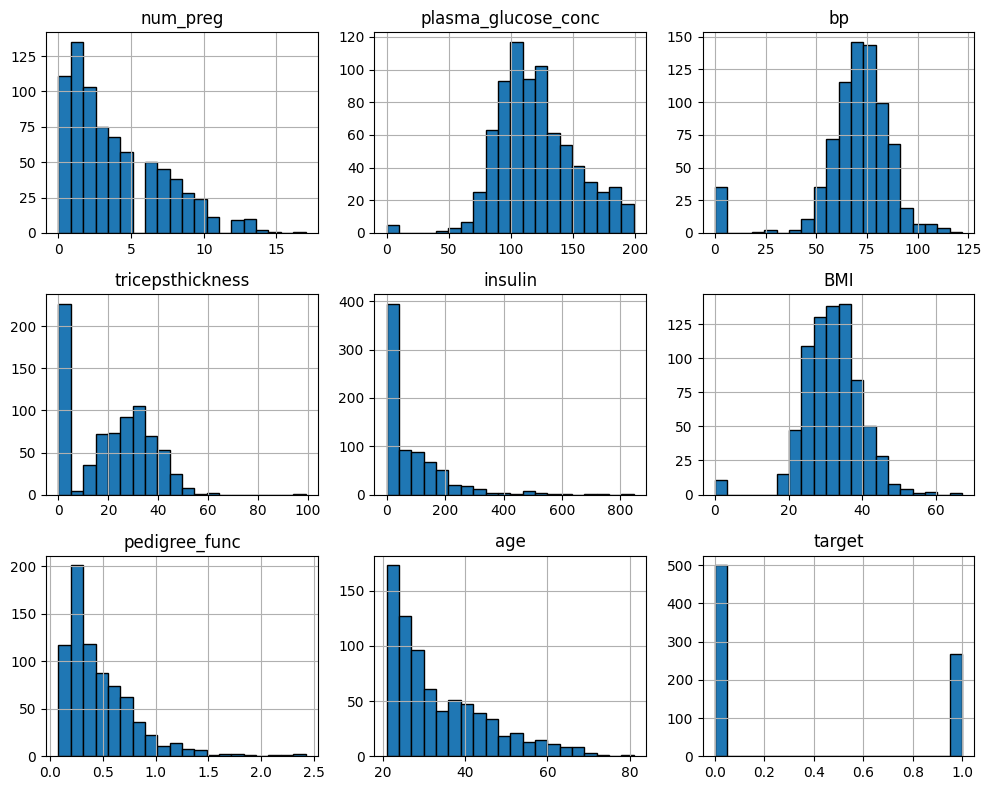

In [121]:
data.hist(bins=20, edgecolor='black', figsize=(10, 8)) 
plt.tight_layout() 
plt.show()

<Axes: >

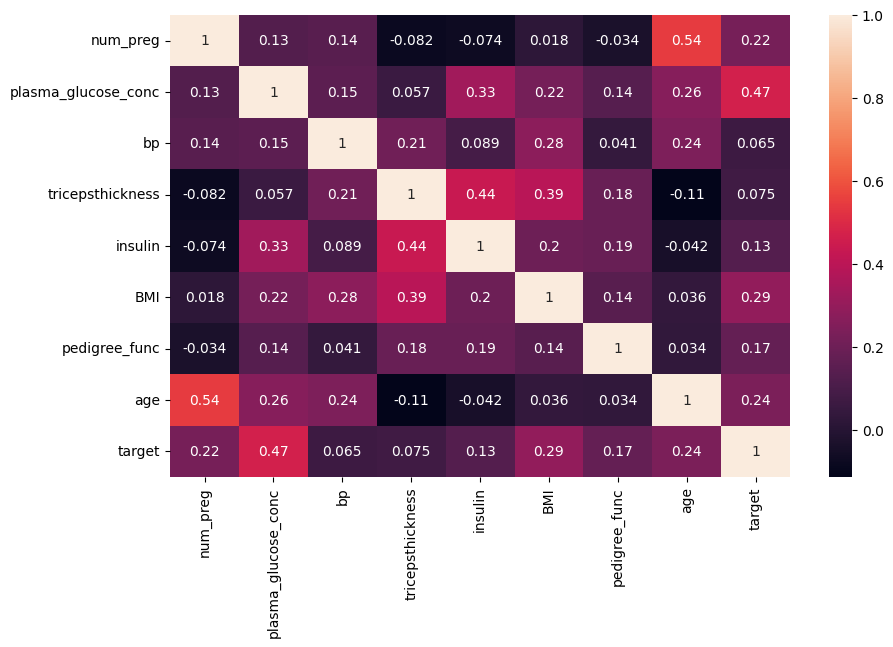

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

# Feature Engineering

In [116]:
ss=StandardScaler()
x=data.drop(["target"],axis=1)
y=data["target"]
x=ss.fit_transform(x)

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Classifiers

In [118]:
classifier={
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "SVC":SVC(),
    "Gradiant Boosting Classifier":GradientBoostingClassifier(),
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "LGBM Classifier":LGBMClassifier() 
}

In [126]:
results={}
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    results[name] = accuracy*100

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [133]:
results_df = pd.DataFrame(list(results.items()), columns=["Classifier", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

In [134]:
results_df

,Classifier,Accuracy
1,Random Forest Classifier,76.623377
6,Naive Bayes,76.623377
0,Decision Tree Classifier,75.974026
4,Logistic Regression,75.324675
3,Gradiant Boosting Classifier,74.025974
7,Ada Boost Classifier,73.376623
2,SVC,72.727273
8,LGBM Classifier,70.129870
5,KNN,68.831169


# Results

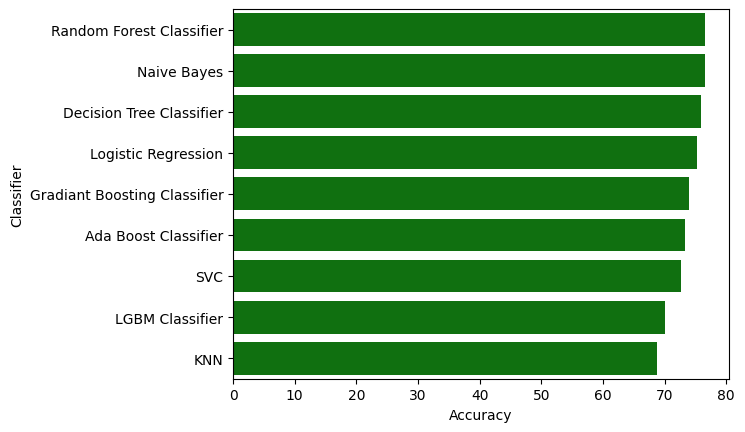

In [135]:
sns.barplot(x="Accuracy",y="Classifier",data=results_df,color="green")
plt.show()